### Victor M. Zavala 2016 
### University of Wisconsin-Madison 

In [132]:
# Loading packages:

using JuMP 
using Distributions 
using Ipopt
using PyPlot 

In [133]:
# Generate random data: 

N = 1000
srand(0)
μ = 0; σ = 2; 
d = Normal(μ,σ)
R = rand(d,N);

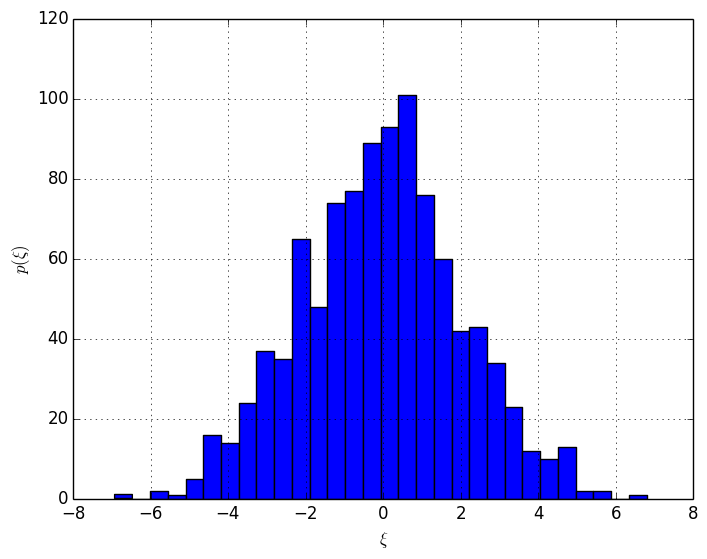

PyObject <matplotlib.text.Text object at 0x32b774b90>

In [134]:
# Plotting:

plt[:hist](R, bins = 30)
grid("on")
xlabel(L"\xi")
ylabel(L"p(\xi)")
#savefig("ex1data.pdf")

## Ex1Gauss

In [135]:
# ex1gauss.mod 

function ex1GaussModel(xip)
    m = Model(solver=IpoptSolver(print_level=0))
    @defVar(m, x)
    @setObjective(m, Min, (x-xip)^2 - x*xip)
    
    solve(m)
    obj = getObjectiveValue(m)
    x = getValue(x)
    
    return obj,x
end
        
# solve problems with data points
solex1gauss = zeros(N)
solxex1gauss = zeros(N)

for i=1:N 
    (solex1gauss[i], solxex1gauss[i]) = ex1GaussModel(R[i])
end 

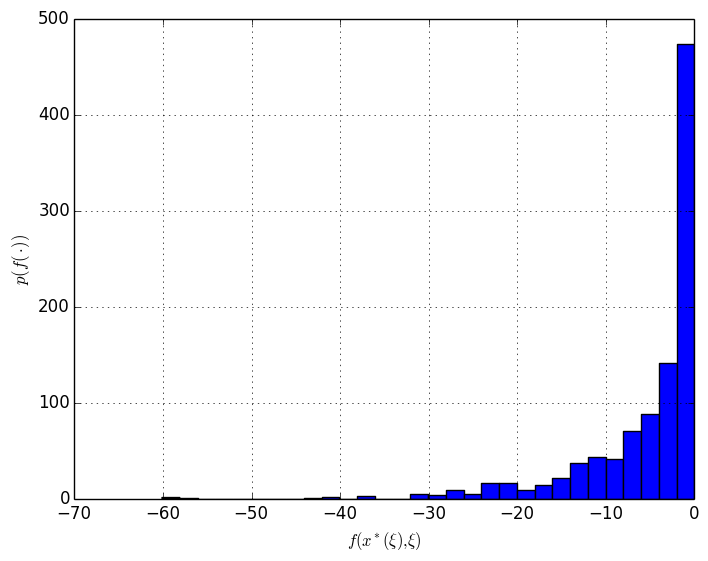

PyObject <matplotlib.text.Text object at 0x32ba41fd0>

In [136]:
# Plotting: 

sol = solex1gauss;
solx = solxex1gauss;

plt[:hist](sol, bins = 30)
grid("on")
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")
#savefig("ex1solgauss.pdf")

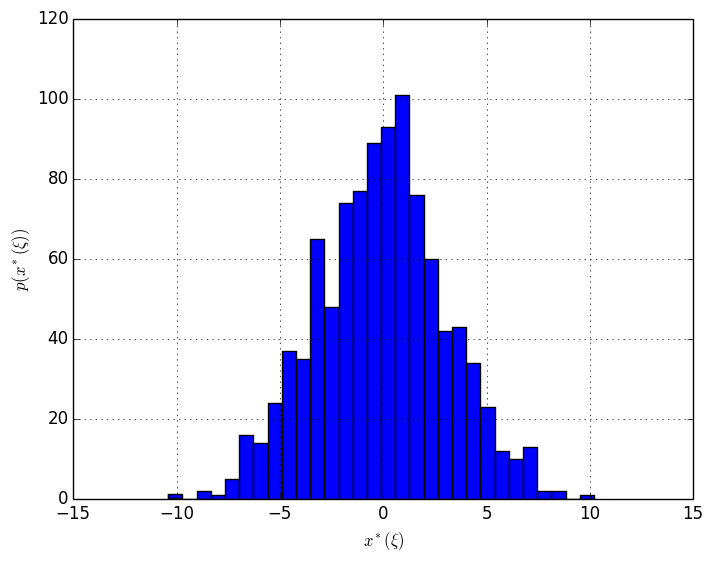

PyObject <matplotlib.text.Text object at 0x32c1140d0>

In [137]:
plt[:hist](solx, bins = 30)
grid("on")
xlabel(L"x^*(\xi)")
ylabel(L"p(x^*(\xi))")
#savefig("ex1solxgauss.pdf")

## Ex1GaussCons

In [138]:
# ex1gausscons.mod

function ex1GaussConsModel(xip)
    m = Model(solver=IpoptSolver(print_level=0))
    @defVar(m, -1 <= x <= 1)
    @setObjective(m, Min, (x-xip)^2 - x*xip)
    
    solve(m)
    obj = getObjectiveValue(m)
    x = getValue(x)
    
    return obj,x
end
        
# solve problems with data points
solex1gausscons = zeros(N)
solxex1gausscons = zeros(N)

for i=1:N 
    (solex1gausscons[i], solxex1gausscons[i]) = ex1GaussConsModel(R[i])
end 

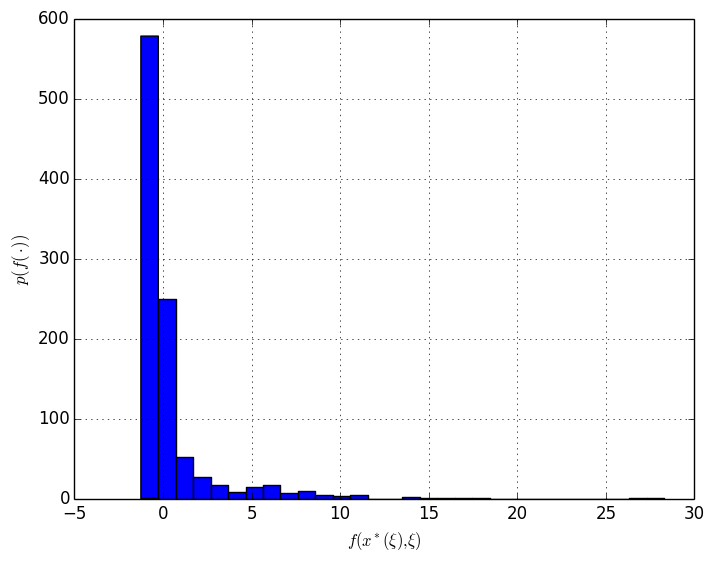

PyObject <matplotlib.text.Text object at 0x32c27ac90>

In [139]:
# Plotting: 

sol = solex1gausscons
solx = solxex1gausscons

plt[:hist](sol, bins = 30)
grid("on")
xlabel(L"f(x^*(\xi),\xi)")
ylabel(L"p(f(\cdot))")
#savefig("ex1solgausscons.pdf")

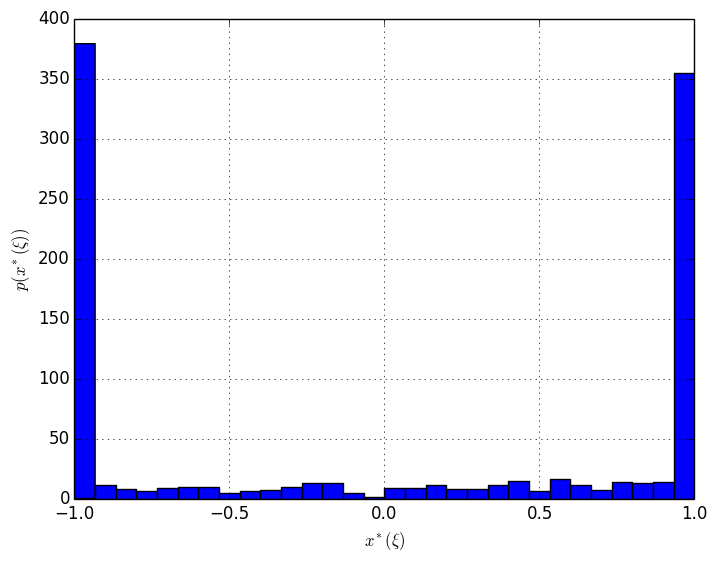

PyObject <matplotlib.text.Text object at 0x32c7a5190>

In [140]:
plt[:hist](solx, bins = 30)
grid("on")
xlabel(L"x^*(\xi)")
ylabel(L"p(x^*(\xi))")
#savefig("ex1solxgausscons.pdf") 